In [33]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as st


In [34]:

# Locate CSVs in resources in folder
net_overseas_migration_larger_states = Path("Resources/Graph 5.1 Net overseas migration(a) - larger states(b) - year ending.csv")
net_overseas_migration_smaller_states = Path("Resources/Graph 5.2 Net overseas migration(a) - smaller states and territories(b) - year ending.csv")

# Load CSV files into DataFrames and remove the first rows (as not relevant data)
df_larger_states_migration = pd.read_csv(net_overseas_migration_larger_states, skiprows=1)
df_smaller_states_migration = pd.read_csv(net_overseas_migration_smaller_states, skiprows=1)

# Merge into one migration dataframe
merged_df_migration = pd.merge(df_larger_states_migration, df_smaller_states_migration, on='Quarter')

#Display migration dataframe
merged_df_migration

# Remove rows with no values 
merged_df_migration = merged_df_migration.dropna(subset=['Quarter'])

# Remove non-date values 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering) 
merged_df_migration['Quarter'] = pd.to_datetime(merged_df_migration['Quarter'], format='%b-%y')

# Filter to remove data after December 2021 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'] <= pd.to_datetime('Dec-21', format='%b-%y')]

# Convert the Quarter column back to original format (for cleaner visualisation)
merged_df_migration['Quarter'] = merged_df_migration['Quarter'].dt.strftime('%b-%y')

#Display cleaned merged migration dataframe
merged_df_migration.head(3)

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65


In [35]:

# Convert to percentage movement per quarter
for column in merged_df_migration.columns[1:]:  
    merged_df_migration[column + ' Variation'] = round(merged_df_migration[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
merged_df_migration.fillna(0, inplace=True)


In [36]:

#Display cleaned merged migration dataframe
merged_df_migration

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000),NSW ('000) Variation,Vic. ('000) Variation,Qld ('000) Variation,WA ('000) Variation,SA ('000) Variation,Tas. ('000) Variation,NT ('000) Variation,ACT ('000) Variation
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77,3.15,0.81,-10.97,-16.11,2.48,13.04,-15.40,-5.14
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65,-1.86,-1.70,-10.15,-17.79,1.34,-1.65,-13.32,-4.33
3,Mar-14,68.68,59.18,30.97,23.87,12.21,1.82,2.67,2.80,1.63,1.16,-7.44,-17.86,0.66,1.68,-16.30,5.66
4,Jun-14,66.99,56.91,27.22,18.75,11.64,1.80,1.75,2.72,-2.46,-3.84,-12.11,-21.45,-4.67,-1.10,-34.46,-2.86
5,Sep-14,67.67,57.64,24.70,16.39,11.06,1.66,1.56,3.06,1.02,1.28,-9.26,-12.59,-4.98,-7.78,-10.86,12.50
6,Dec-14,68.35,58.39,23.03,15.51,10.97,1.73,1.14,3.21,1.00,1.30,-6.76,-5.37,-0.81,4.22,-26.92,4.90
7,Mar-15,69.44,58.93,21.26,13.99,11.21,1.74,1.21,3.31,1.59,0.92,-7.69,-9.80,2.19,0.58,6.14,3.12
8,Jun-15,70.31,60.69,20.43,14.07,11.15,1.52,2.35,3.50,1.25,2.99,-3.90,0.57,-0.54,-12.64,94.21,5.74
9,Sep-15,71.48,61.96,19.29,13.44,11.29,1.63,1.83,3.30,1.66,2.09,-5.58,-4.48,1.26,7.24,-22.13,-5.71


In [37]:
# Slice the migration dataframe to perform calculations for the Summary Statistics
reduced_migration_df = merged_df_migration[["NSW ('000)", "Vic. ('000)", "Qld ('000)", "WA ('000)",
       "SA ('000)", "Tas. ('000)", "NT ('000)", "ACT ('000)"]]

# Display the sliced dataframe
reduced_migration_df.head(2)

,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77


In [38]:
# Convert the columns names into a list to be used in the plots
states = ['NSW','VIC','QLD','WA','SA','TAS','NT','ACT']

# Create list containers to store the calculations
migration_average_list = []
migration_median_list = []
migration_variance_list = []
migration_stddev_list = []
migration_max_list = []
migration_min_list = []
net_migration_list = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_migration_df:
    # calculate the mean for the column
    migration_mean = round(reduced_migration_df[columns].mean(),2)
    # append the calculated mean into the container
    migration_average_list.append(migration_mean)
    # calculate the median for the column
    migration_median = round(reduced_migration_df[columns].median(),2)
    # append the calculated median into the container
    migration_median_list.append(migration_median)
    # calculate the variance for the column
    migration_variance = round(reduced_migration_df[columns].var(),2)
    # append the calculated variance into the container
    migration_variance_list.append(migration_variance)
    # calculate the standard deviation for the column
    migration_std_dev = round(reduced_migration_df[columns].std(),2)
    # append the calculated standard deviation into the container
    migration_stddev_list.append(migration_std_dev)
    # find the maximum value of the column
    migration_max = round(reduced_migration_df[columns].max(),2)
    # append the maximum value into the container
    migration_max_list.append(migration_max)
    # find the minimum value of the column
    migration_min = round(reduced_migration_df[columns].min(),2)
    # append the minimum value into the container
    migration_min_list.append(migration_min)
    # calculate the net migration across the timeframe of the dataset
    net_migration = reduced_migration_df[columns].sum()
    # append the net migration into the container
    net_migration_list.append(net_migration)


In [39]:
# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_migration_df = pd.DataFrame({'States':states,
                           'Average':migration_average_list,
                           'Median':migration_median_list,
                           'Variance':migration_variance_list,
                           'Standard Deviation':migration_stddev_list,
                           'Max': migration_max_list,
                           'Min': migration_min_list,
                           "Net Migration (2013-2021) ('000)": net_migration_list
                           })

In [40]:

# Display the summary statistics
summary_stats_migration_df

,States,Average,Median,Variance,Standard Deviation,Max,Min,Net Migration (2013-2021) ('000)
0,NSW,67.32,72.84,1058.30,32.53,105.50,-15.38,2356.35
1,VIC,57.03,64.19,1709.32,41.34,91.29,-52.99,1996.02
2,QLD,23.50,27.74,206.33,14.36,41.83,-15.19,822.49
3,WA,14.88,13.44,103.75,10.19,42.14,-5.43,520.77
4,SA,10.72,11.99,26.40,5.14,18.03,-3.26,375.28
5,TAS,2.08,1.82,1.10,1.05,4.00,-0.32,72.65
6,NT,1.33,1.14,1.10,1.05,4.35,-0.50,46.45
7,ACT,2.51,3.21,4.30,2.07,4.60,-3.15,87.75


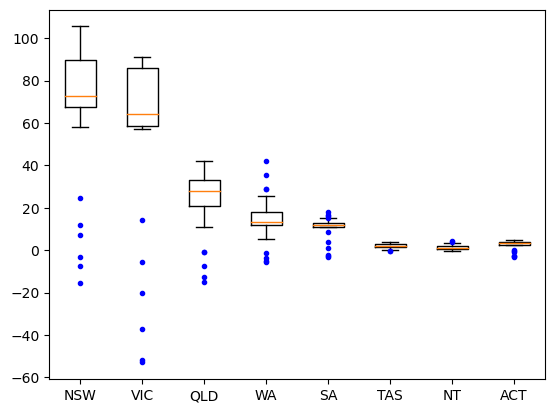

In [41]:
# Create a box plot chart with the data from the migration dataframe
plt.boxplot(reduced_migration_df, labels = states, sym = '.b')

plt.show()

In [42]:
# Locate CSVs in resources in folder
residential_property_price_indexes = Path("Resources/Residential Property Price Indexes, capital cities.csv")

#Load CSV file into DataFrame and remove the first row (as not relevant data)
df_property_price_indexes = pd.read_csv(residential_property_price_indexes, skiprows=1)

# Remove rows with no values 
df_property_price_indexes = df_property_price_indexes.dropna(subset=['Quarter'])

# Remove non-date values 
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering)
df_property_price_indexes['Quarter'] = pd.to_datetime(df_property_price_indexes['Quarter'], format='%b-%y')

# Filter to remove data pre June 2013 (to align data range with migration data)
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'] >= pd.to_datetime('Jun-13', format='%b-%y')]

# Convert the Quarter column back to original format for cleaner visualisation
df_property_price_indexes['Quarter'] = df_property_price_indexes['Quarter'].dt.strftime('%b-%y')


In [43]:
# Reorganising the columns to align with the order of the migration data (swap Adelaide and Perth)
df_property_price_indexes = df_property_price_indexes[["Quarter", "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Hobart", "Darwin", "Canberra"]]
df_property_price_indexes.head(2)

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [44]:
# Convert the indexes into percentage movement per quarter
for column in df_property_price_indexes.columns[1:]:  
    df_property_price_indexes[column + ' Variation'] = round(df_property_price_indexes[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
df_property_price_indexes.fillna(0, inplace=True)

#Display cleaned dataframe
df_property_price_indexes.head()

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Sydney Variation,Melbourne Variation,Brisbane Variation,Perth Variation,Adelaide Variation,Hobart Variation,Darwin Variation,Canberra Variation
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,3.77,3.12,1.26,0.09,0.40,1.00,0.27,0.10
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,5.50,3.59,2.49,2.89,3.06,2.28,1.35,0.69
9,Mar-14,121.7,110.7,108.5,114.8,105.4,103.7,114.0,102.3,2.27,0.91,1.31,0.79,0.96,0.39,1.06,0.49
10,Jun-14,126.0,112.1,110.5,114.8,105.6,104.1,114.7,103.3,3.53,1.26,1.84,0.00,0.19,0.39,0.61,0.98


In [45]:
# Slice the Property Dataframe to perform calculations for the Summary Statistics
reduced_property_df = df_property_price_indexes[['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]

# Display the sliced dataframe
reduced_property_df.head(2)


,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [46]:
# Convert the columns names into a list to be used in the plots
capitals = list(reduced_property_df.columns)

# Create list containers to store the calculations
property_prices_average_list = []
property_prices_median_list = []
property_prices_variance_list = []
property_prices_stddev_list = []
property_prices_max_list = []
property_prices_min_list = []
property_prices_total_variation = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_property_df:
    # calculate the mean for the column
    property_prices_mean = round(reduced_property_df[columns].mean(),2)
    # append the calculated mean into the container
    property_prices_average_list.append(property_prices_mean)
    # calculate the median for the column
    property_prices_median = round(reduced_property_df[columns].median(),2)
    # append the calculated median into the container
    property_prices_median_list.append(property_prices_median)
    # calculate the variance for the column
    property_prices_variance = round(reduced_property_df[columns].var(),2)
    # append the calculated variance into the container
    property_prices_variance_list.append(property_prices_variance)
    # calculate the standard deviation for the column
    property_prices_std_dev = round(reduced_property_df[columns].std(),2)
    # append the calculated standard deviation into the container
    property_prices_stddev_list.append(property_prices_std_dev)
    # find the maximum value of the column
    property_prices_max = round(reduced_property_df[columns].max(),2)
    # append the maximum value into the container
    property_prices_max_list.append(property_prices_max)
    # find the minimum value of the column
    property_prices_min = round(reduced_property_df[columns].min(),2)
    # append the minimum value into the container
    property_prices_min_list.append(property_prices_min)
    # fetch the data from the first quarter from the dataset
    property_prices_start = reduced_property_df.loc[reduced_property_df.index[0],columns]
    # fetch the data from the last quarter from the dataset
    property_prices_end = reduced_property_df.loc[reduced_property_df.index[-1],columns]
    # calculate the total variation from the first to the last measurement from the dataset
    property_prices_variation = round((property_prices_end - property_prices_start) / property_prices_start * 100, 2)
    # append the total variation calculated into the container
    property_prices_total_variation.append(property_prices_variation)


In [47]:
# Create a list with the capitals latitude and longitude coordinates
cap_latitude = [-33.8678, -37.8142 , -27.4678, -31.9559, -34.9275,-42.8806,-12.4381,-35.2931]
cap_longitude = [151.2100, 144.9631, 153.0281, 115.8606, 138.6000,147.3250,130.8411,149.1269]

In [48]:

# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_properties_df = pd.DataFrame({'Cities':capitals,
                           'Average':property_prices_average_list,
                           'Median':property_prices_median_list,
                           'Variance':property_prices_variance_list,
                           'Standard Deviation':property_prices_stddev_list,
                           'Max': property_prices_max_list,
                           'Min': property_prices_min_list,
                           'Total Variation (%)': property_prices_total_variation,
                           'Latitude':cap_latitude,
                           'Longitude':cap_longitude 
                           })

In [49]:
# Display the summary statistics
summary_stats_properties_df

,Cities,Average,Median,Variance,Standard Deviation,Max,Min,Total Variation (%),Latitude,Longitude
0,Sydney,158.91,160.5,622.74,24.95,218.7,108.7,101.20,-33.8678,151.2100
1,Melbourne,138.89,142.9,434.45,20.84,185.7,102.7,80.82,-37.8142,144.9631
2,Brisbane,121.75,121.7,146.15,12.09,164.9,103.2,59.79,-27.4678,153.0281
3,Perth,107.69,106.6,35.20,5.93,120.1,98.5,8.59,-31.9559,115.8606
4,Adelaide,117.82,118.7,140.69,11.86,156.3,100.9,54.91,-34.9275,138.6000
5,Hobart,133.72,129.0,864.63,29.40,211.1,100.0,111.10,-42.8806,147.3250
6,Darwin,100.86,100.1,94.07,9.70,114.7,86.9,-8.92,-12.4381,130.8411
7,Canberra,121.25,121.5,295.36,17.19,173.5,101.0,71.78,-35.2931,149.1269


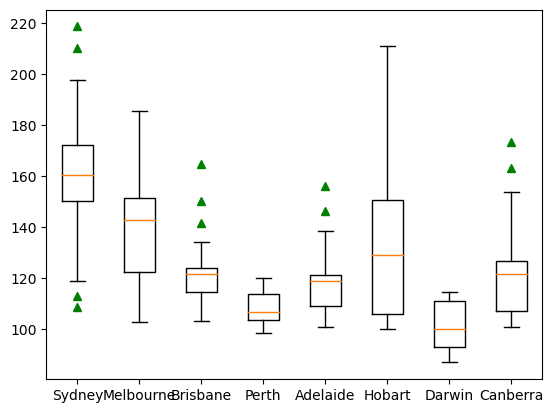

In [50]:
# Create a box plot chart with the data from the property prices dataframe
plt.boxplot(reduced_property_df, labels = capitals, sym = '^g')

plt.show()

In [51]:
migration_total_variation_xaxis = summary_stats_migration_df["Net Migration (2013-2021) ('000)"]
property_total_variation_yaxis = summary_stats_properties_df['Total Variation (%)']


In [52]:
migration_total_variation_xaxis

0    2356.35
1    1996.02
2     822.49
3     520.77
4     375.28
5      72.65
6      46.45
7      87.75
Name: Net Migration (2013-2021) ('000), dtype: float64

In [53]:
property_total_variation_yaxis

0    101.20
1     80.82
2     59.79
3      8.59
4     54.91
5    111.10
6     -8.92
7     71.78
Name: Total Variation (%), dtype: float64

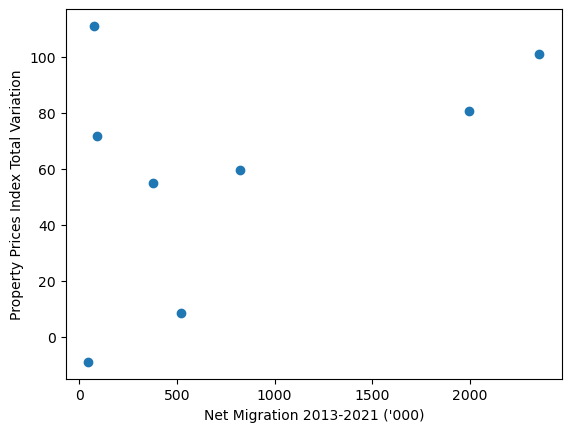

In [54]:
# colours = ['blue','green','yellow','red','black','blue','magenta','pink']
plt.scatter(migration_total_variation_xaxis,property_total_variation_yaxis)
plt.xlabel("Net Migration 2013-2021 ('000)")
plt.ylabel("Property Prices Index Total Variation")
plt.show()

In [55]:
# Slice the migration dataframe to perform calculations for the Summary Statistics
line_chart_df = merged_df_migration[["Quarter","NSW ('000)", "Vic. ('000)", "Qld ('000)", "WA ('000)",
       "SA ('000)", "Tas. ('000)", "NT ('000)", "ACT ('000)"]]

# Display the sliced dataframe
line_chart_df.head(2)

renamed_line_chart_df = line_chart_df.rename(columns={"NSW ('000)":"migration NSW", 
                                                            "Vic. ('000)":"migration Vic",
                                                            "Qld ('000)":"migration QLD",
                                                            "WA ('000)":"migration WA",
                                                            "SA ('000)":"migration SA",
                                                            "Tas. ('000)":"migration TAS",
                                                            "NT ('000)":"migration NT",
                                                            "ACT ('000)":"migration ACT"
                                                    })
renamed_line_chart_df.head(2)

,Quarter,migration NSW,migration Vic,migration QLD,migration WA,migration SA,migration TAS,migration NT,migration ACT
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77


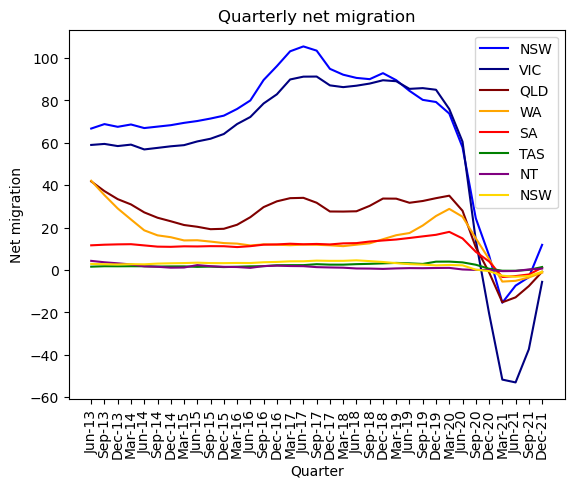

In [56]:
# plot line charts for net migration for each state/territory

x = renamed_line_chart_df["Quarter"]
y_1 = renamed_line_chart_df["migration NSW"]
y_2 = renamed_line_chart_df["migration Vic"]
y_3 = renamed_line_chart_df["migration QLD"]
y_4 = renamed_line_chart_df["migration WA"]
y_5 = renamed_line_chart_df["migration SA"]
y_6 = renamed_line_chart_df["migration TAS"]
y_7 = renamed_line_chart_df["migration NT"]
y_8 = renamed_line_chart_df["migration ACT"]

plt.title("Quarterly net migration")
plt.xlabel("Quarter")
plt.ylabel("Net migration")

NSW, = plt.plot(x, y_1, color="blue", label="NSW")
Vic, = plt.plot(x, y_2, color="navy", label="VIC")
QLD, = plt.plot(x, y_3, color="maroon", label="QLD")
WA, = plt.plot(x, y_4, color="orange", label="WA")
SA, = plt.plot(x, y_5, color="red", label="SA")
TAS, = plt.plot(x, y_6, color="green", label="TAS")
NT, = plt.plot(x, y_7, color="purple", label="NT")
ACT, = plt.plot(x, y_8, color="gold", label="NSW")

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# Slice the Property Dataframe to perform calculations for the Summary Statistics
line_property_df = df_property_price_indexes[['Quarter','Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]

# Display the sliced dataframe
line_property_df.head(2)


,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


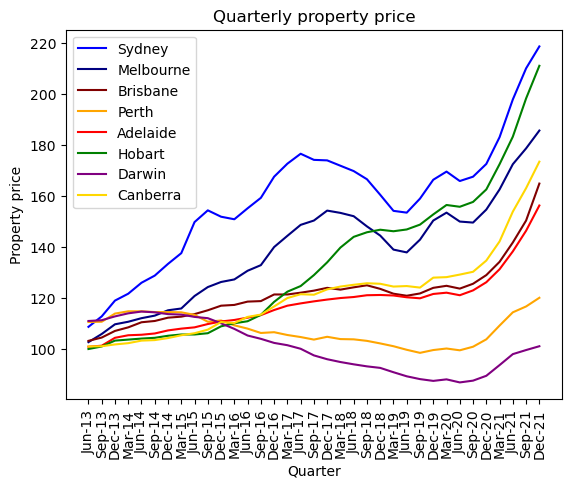

In [58]:
# plot line charts for property price for each capital city
x_p = line_property_df["Quarter"]
y_1_p = line_property_df["Sydney"]
y_2_p = line_property_df["Melbourne"]
y_3_p = line_property_df["Brisbane"]
y_4_p = line_property_df["Perth"]
y_5_p = line_property_df["Adelaide"]
y_6_p = line_property_df["Hobart"]
y_7_p = line_property_df["Darwin"]
y_8_p = line_property_df["Canberra"]

plt.title("Quarterly property price")
plt.xlabel("Quarter")
plt.ylabel("Property price")

Sydney, = plt.plot(x, y_1_p, color="blue", label="Sydney")
Melbourne, = plt.plot(x, y_2_p, color="navy", label="Melbourne")
Brisbane, = plt.plot(x, y_3_p, color="maroon", label="Brisbane")
Perth, = plt.plot(x, y_4_p, color="orange", label="Perth")
Adelaide, = plt.plot(x, y_5_p, color="red", label="Adelaide")
Hobart, = plt.plot(x, y_6_p, color="green", label="Hobart")
Darwin, = plt.plot(x, y_7_p, color="purple", label="Darwin")
Canberra, = plt.plot(x, y_8_p, color="gold", label="Canberra")

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [59]:
 # Net Migration ('000s) 2013-2021 Map

# Create a dictionary containing coordinates
coordinates_migration = {
    "latitude": [-33.8678, -37.8142, -27.4678, -31.9559, -34.9275, -42.8806, -12.4381, -35.2931],
    "longitude": [151.2100, 144.9631, 153.0281, 115.8606, 138.6000, 147.3250, 130.8411, 149.1269],
    "City": ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Hobart", "Darwin", "Canberra"],
    "Net Migration (2013-2021)('000)": [2356.35, 1996.02, 822.49, 520.77, 375.28, 72.65, 46.45, 87.75]
}

# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates_migration)

# Define colors for each city
city_colors = {
    'Sydney': 'blue',
    'Melbourne': 'navy',
    'Brisbane': 'maroon',
    'Perth': 'orange',
    'Adelaide': 'red',
    'Hobart': 'green',
    'Darwin': 'purple',
    'Canberra': 'gold'
}

# Map city names to colors
coordinates_df['color'] = coordinates_df['City'].map(city_colors)

# Configure the map plot_migration
map_plot_migration = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles="OSM",
    size="Net Migration (2013-2021)('000)",
    c='color',
    title = "Net Overseas Migration ('000s) June 2013 - December 2021",
    frame_width = 750,
    frame_height = 600,
)

# Display the map plot_migration
map_plot_migration

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (color,Net Migration (2013-2021)('000))

In [60]:
# Define the Net Migration as the x_axis for the scatter plot
xaxis = summary_stats_migration_df["Net Migration (2013-2021) ('000)"]

# Define the Total Variation as the y_axis for the scatter plot
yaxis = summary_stats_properties_df['Total Variation (%)']


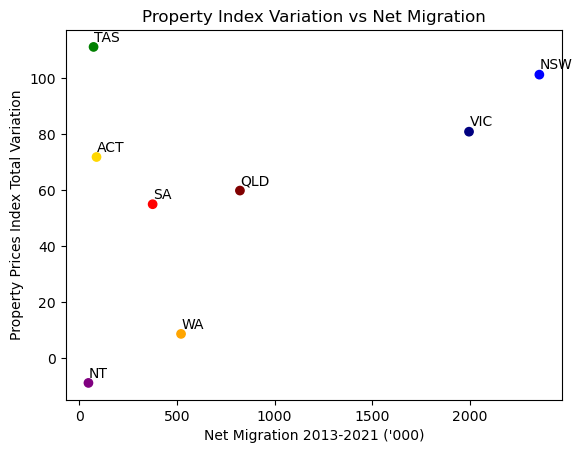

In [61]:

# Create a list of colours to be used in the scatter plot for each point
colours = ['blue','navy','maroon','orange','red','green','purple','gold']

# Build the scatter plot using the subplots function
fig, ax = plt.subplots()
# Declare the axis and the colour parameter based on the variables defined
ax.scatter(xaxis,yaxis, color= colours)

# Add labels close to the points
for i, txt in enumerate(states):
    ax.annotate(txt, (xaxis[i], yaxis[i]), xytext=(xaxis[i]+2, yaxis[i]+2))

# Set the x axis label
plt.xlabel("Net Migration 2013-2021 ('000)")

# Set the y axis label
plt.ylabel("Property Prices Index Total Variation")

# Set the title of the scatter plot
plt.title("Property Index Variation vs Net Migration")

# Display the graph
plt.show()

### Calculate the correlation between the variation of the quarterly net migration and the variation of the property price index

In [62]:
# Filter the migration variation from the migration complete dataframe
migration_variation_df = merged_df_migration[["Quarter","NSW ('000) Variation", "Vic. ('000) Variation", "Qld ('000) Variation",
       "WA ('000) Variation", "SA ('000) Variation", "Tas. ('000) Variation",
       "NT ('000) Variation", "ACT ('000) Variation"]]

# Filter the property variation from the property complete dataframe
property_variation_df = df_property_price_indexes[['Quarter','Sydney Variation',
       'Melbourne Variation', 'Brisbane Variation', 'Perth Variation',
       'Adelaide Variation', 'Hobart Variation', 'Darwin Variation',
       'Canberra Variation']]

# Merge the  migration variation and property variation dataframes
merged_variation_df = pd.merge(migration_variation_df,property_variation_df, how='outer', on="Quarter")


# Create a container to store the correlations to be calculated
correlations_list = []

# Calculate the correlation between the NSW net migration variation and the property index variation in Sydney
nsw_correl_calculation = st.pearsonr(merged_variation_df["NSW ('000) Variation"],merged_variation_df['Sydney Variation'])
correlations_list.append(round(nsw_correl_calculation[0],2))

# Calculate the correlation between the VIC net migration variation and the property index variation in Melbourne
vic_correl_calculation = st.pearsonr(merged_variation_df["Vic. ('000) Variation"],merged_variation_df['Melbourne Variation'])
correlations_list.append(round(vic_correl_calculation[0],2))

# Calculate the correlation between the QLD net migration variation and the property index variation in Brisbane
qld_correl_calculation = st.pearsonr(merged_variation_df["Qld ('000) Variation"],merged_variation_df['Brisbane Variation'])
correlations_list.append(round(qld_correl_calculation[0],2))

# Calculate the correlation between the WA net migration variation and the property index variation in Perth
wa_correl_calculation = st.pearsonr(merged_variation_df["WA ('000) Variation"],merged_variation_df['Perth Variation'])
correlations_list.append(round(wa_correl_calculation[0],2))

# Calculate the correlation between the SA net migration variation and the property index variation in Adelaide
sa_correl_calculation = st.pearsonr(merged_variation_df["SA ('000) Variation"],merged_variation_df['Adelaide Variation'])
correlations_list.append(round(sa_correl_calculation[0],2))

# Calculate the correlation between the Tas. net migration variation and the property index variation in Hobart
tas_correl_calculation = st.pearsonr(merged_variation_df["Tas. ('000) Variation"],merged_variation_df['Hobart Variation'])
correlations_list.append(round(tas_correl_calculation[0],2))

# Calculate the correlation between the NT net migration variation and the property index variation in Darwin
nt_correl_calculation = st.pearsonr(merged_variation_df["NT ('000) Variation"],merged_variation_df['Darwin Variation'])
correlations_list.append(round(nt_correl_calculation[0],2))

# Calculate the correlation between the ACT net migration variation and the property index variation in Canberra
act_correl_calculation = st.pearsonr(merged_variation_df["ACT ('000) Variation"],merged_variation_df['Canberra Variation'])
correlations_list.append(round(act_correl_calculation[0],2))

### Calculate the correlations excluding the Covid-19 period (before Mar-20)

In [63]:
# Convert the Quarter column to datetime format (to enable filtering) 
merged_variation_df['Quarter'] = pd.to_datetime(merged_variation_df['Quarter'], format='%b-%y')

# Filter to remove data after March/20 and save it as a separate dataframe 
merged_variation_df_no_covid = merged_variation_df[merged_variation_df['Quarter'] <= pd.to_datetime('Mar-20', format='%b-%y')]

# Convert the Quarter column back to original format (for cleaner visualisation)
merged_variation_df['Quarter'] = merged_variation_df['Quarter'].dt.strftime('%b-%y')
merged_variation_df_no_covid['Quarter'] = merged_variation_df_no_covid['Quarter'].dt.strftime('%b-%y')

# Create two containers to store the correlations to be calculated
no_covid_correlations_list = []

# Calculate the correlation between the NSW net migration variation and the property index variation in Sydney
nsw_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["NSW ('000) Variation"],merged_variation_df_no_covid['Sydney Variation'])
no_covid_correlations_list.append(round(nsw_no_covid_correl_calculation[0],2))

# Calculate the correlation between the VIC net migration variation and the property index variation in Melbourne
vic_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["Vic. ('000) Variation"],merged_variation_df_no_covid['Melbourne Variation'])
no_covid_correlations_list.append(round(vic_no_covid_correl_calculation[0],2))

# Calculate the correlation between the QLD net migration variation and the property index variation in Brisbane
qld_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["Qld ('000) Variation"],merged_variation_df_no_covid['Brisbane Variation'])
no_covid_correlations_list.append(round(qld_no_covid_correl_calculation[0],2))

# Calculate the correlation between the WA net migration variation and the property index variation in Perth
wa_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["WA ('000) Variation"],merged_variation_df_no_covid['Perth Variation'])
no_covid_correlations_list.append(round(wa_no_covid_correl_calculation[0],2))

# Calculate the correlation between the SA net migration variation and the property index variation in Adelaide
sa_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["SA ('000) Variation"],merged_variation_df_no_covid['Adelaide Variation'])
no_covid_correlations_list.append(round(sa_no_covid_correl_calculation[0],2))

# Calculate the correlation between the Tas. net migration variation and the property index variation in Hobart
tas_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["Tas. ('000) Variation"],merged_variation_df_no_covid['Hobart Variation'])
no_covid_correlations_list.append(round(tas_no_covid_correl_calculation[0],2))

# Calculate the correlation between the NT net migration variation and the property index variation in Darwin
nt_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["NT ('000) Variation"],merged_variation_df_no_covid['Darwin Variation'])
no_covid_correlations_list.append(round(nt_no_covid_correl_calculation[0],2))

# Calculate the correlation between the ACT net migration variation and the property index variation in Canberra
act_no_covid_correl_calculation = st.pearsonr(merged_variation_df_no_covid["ACT ('000) Variation"],merged_variation_df_no_covid['Canberra Variation'])
no_covid_correlations_list.append(round(act_no_covid_correl_calculation[0],2))

In [64]:
# Consolidate all correlations calculated in one dataframe
summary_correlations_df = pd.DataFrame({'States':states,
                                        'Total Correlation':correlations_list,
                                        'Correlation w/o Covid':no_covid_correlations_list,
                                        })

In [65]:
summary_correlations_df

,States,Total Correlation,Correlation w/o Covid
0,NSW,-0.26,0.24
1,VIC,0.03,0.14
2,QLD,0.14,-0.24
3,WA,-0.67,-0.28
4,SA,-0.66,-0.08
5,TAS,0.26,0.26
6,NT,-0.51,-0.13
7,ACT,0.14,0.08
